In [15]:
import numpy as np
import sympy
from sympy import I, latex, S, Symbol
from IPython.display import display, Latex
import matplotlib.pyplot as plt
from sympy import expand_complex

# Практическое занятие 9
# Компьютерный практикум по алгебре на Python
## Комплексные числа в sympy
### Задание 1.
Даны комплексные числа
$$
z_1 = 5\sqrt{3} + 5i,\quad z_2 = -3 + 3i,\quad z_3 = - 1 + i,\quad z_4 = i,\quad z_5 = \frac{12}{13} + \frac{5}{13}i,
$$
вычислить (представить в алгебраической форме) с помощью sympy
$$
z_1 \cdot z_2,\quad (z_2 - 5z_3)^6,\quad \sqrt{\frac{z_4}{z_3}},\quad \frac{z_1^2 + z_3}{13z_5 - 2z_2}.
$$

In [ ]:
z1 = 5 * sympy.sqrt(3) + 5 * I
z2 = -3 + 3 * I
z3 = -1 + I
z4 = I
z5 = S(12)/13 + S(5)/13 * I
display(sympy.expand_complex((z1 * z2)), 
        sympy.expand_complex((z2 - 5 * z3)**6), 
        sympy.expand_complex(sympy.sqrt(z4 / z3)), 
        sympy.expand_complex((z1**2 + z3) / (13*z5 - 2*z2))
        )

### Задание  2.
Вычисления Задания 1 проделать для мнимой единицы из Python (использовать встроенную функцию complex).

In [ ]:
z1 = complex(5 * 3**0.5, 5)
z2 = complex(-3, 3)
z3 = complex(-1, 1)
z4 = complex(0, 1)
z5 = complex(S(12)/13, S(5)/13)

display(z1 * z2, 
        (z2 - 5 * z3)**6, 
        (z4 / z3)**0.5, 
        (z1**2 + z3) / (13*z5 - 2*z2)
        )

(-40.98076211353316+10.980762113533157j)

(-0+512j)

(0.7768869870150187-0.32179712645279135j)

(2.4442998757586336+5.002602236344583j)

### Задание  3.
Изобразить на координатной плоскости точки, соответствующие корням  $7$-й степени комплексного числа $z = \frac{3}{5} + i\frac{3}{5}$. Подписать точки $A_k$, где $k$  - номер корня.

<IPython.core.display.Latex object>

(-1.5, 1.5)

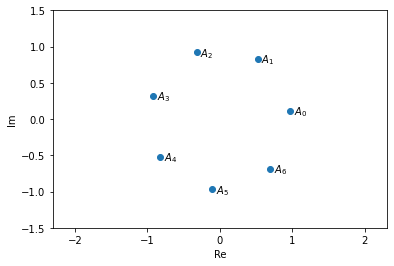

In [ ]:
roots_list = [sympy.root(S(3) / 5 + S(3) / 5 * I, 7, k) for k in range(7)]
display(Latex(latex(roots_list)))

roots = [sympy.expand_complex(item) for item in roots_list]
roots_x = [sympy.re(item) for item in roots_list]
roots_y = [sympy.im(item) for item in roots_list]
plt.scatter(roots_x, roots_y)
for k, x_coord in enumerate(roots_x): 
    plt.annotate(f'$A_{k}$',
            xy=(x_coord, roots_y[k]), 
            xytext=(x_coord + 0.05, roots_y[k] - 0.05)) 
    
plt.axis('equal')
plt.xlabel("Re")
plt.ylabel("Im")
plt.xlim(-2.5, 2.5)
plt.ylim(-1.5, 1.5)

### Задание  4.
Изобразить на координатной плоскости точки, соответствующие $z_4 = - \sqrt{3} + 3i$ и $\bar{z_4}$, подписать $z_4$ тригонометрической формой, $\bar{z_4}$ - экспоненциальной ($z = r e^{i\varphi}$, $r$ и $\varphi$ такие же, как в тригонометрической форме).

(-3.0, 3.0)

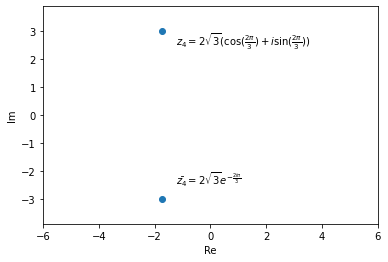

In [51]:
z4 = -sympy.sqrt(3) + 3 * I
z4_rev = sympy.conjugate(z4)

arr = [z4, z4_rev]

roots_x = [sympy.re(item) for item in arr]
roots_y = [sympy.im(item) for item in arr]


r = sympy.functions.Abs(z4)
phi = sympy.functions.arg(z4)
z4_trig = r * (sympy.cos(phi) + sympy.sin(phi) * I)

r_rev = sympy.functions.Abs(z4_rev)
phi_rev = sympy.functions.arg(z4_rev)

pod = [z4_trig, r_rev * Symbol('e')**(I * phi_rev)] 

plt.scatter(roots_x, roots_y)
for k in range(2): 
    if (k == 0):
        plt.annotate(r'${z_4} = ' + f'{latex(r)}(\cos({latex(phi)}) + i\sin({latex(phi)}))$',
        xy=(roots_x[k], roots_y[k]), 
        xytext=(roots_x[k] + 0.5, roots_y[k] - 0.5))
    else:
        plt.annotate(r'$\bar{z_4} =' + f'{latex(pod[k])}$',
        xy=(roots_x[k], roots_y[k]), 
        xytext=(roots_x[k] + 0.5, roots_y[k] + 0.5))


plt.axis('equal')
plt.xlabel("Re")
plt.ylabel("Im")
plt.xlim(-6, 6)
plt.ylim(-3, 3)

#### Задание  5.
Изобразить корни 4 степени числа $5e^{\frac{i\pi}{8}}$, в полярной системе координат, подписи к точкам - аргументы (углы) сответствующих комплексных чисел. 

Число вводить в тригонометрической форме, для получения корней комплексного числа $z = r(\cos(\varphi) + \sin(\varphi))$ использовать формулу 
$\sqrt[n]{z} = \sqrt[n]{r}(\cos(\varphi_k) + i \sin(\varphi_k))$, 
$\varphi_k = \frac{\varphi + 2\pi k}{n}$, $k = 0, ..., n$. 

Вывести алгебраическую форму полученных корней на экран и сравнить с результатом, полученным с помощью sympy.root (с использованием sympy.expand_complex для упрощения выражения). Аналитическое представление оказывается разным.

Для каждого корня найти разность модуля разности корней, полученных двумя способами (т.е. нужно для каждой пары одинаковых корней, полученных двумя способами находить разность корней, вычислять модуль sympy.Abs этой разности и вычислить приближенное значение с помощью evalf()).

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

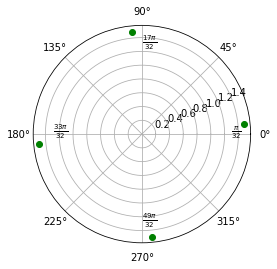

In [53]:
z_0 = 5 * (sympy.cos(sympy.pi / 8) + I * sympy.sin(sympy.pi / 8))

r = sympy.root(5, n, 0)
angle_list = [(sympy.pi / 8 + 2 * sympy.pi * k) / 4 for k in range(n)]

plt.polar(angle_list, [r] * 4, 'go')

for id, val in enumerate(angle_list):
    z = r * (sympy.cos(val) + I * sympy.sin(val))
    root = expand_complex(sympy.root(z_0, 4, id))
    plt.annotate(r'$' + f"{sympy.latex(val)}" + r'$',
                 xy=(val, r),
                 xytext=(val - 0.1, r - 0.2))
    display(Latex(latex(expand_complex(z)) + ', ' + latex(root)))
    display(Latex(r"$Difference\ is\ " + latex(sympy.functions.Abs(z - root).evalf()) + '$'))

### Индивидуальное задание.
Решить уравнение.
Для получения корней использовать sympy.roots.
Корни уравнения вывести на экран в алгебраической, тригонометрической и экспоненциальной форме.

In [52]:
#126
x = Symbol('x')
equation = (4 + 4 * I) * x**2 + (16 - 8 * I) * x - 96 + 32 * I

roots = [sympy.expand_complex(root) for root in sympy.roots(equation)]

for root in roots:
    r = sympy.functions.Abs(root)
    phi = sympy.functions.arg(root)

    display(Latex(f"Алгебраическая форма:\ {latex(root)}"))
    display(Latex(f"Тригонометрическая форма:\ {latex(r)}(\cos({latex(phi)}) + i\sin({latex(phi)}))"))
    display(Latex(r'$' + f"Экспоненциальной форма:\ {latex(r)}\cdot e^" + r'{' + f"{latex(phi)}" + r'}$'))
    print('\n')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>